In [43]:
import pandas as pd
from collections import Counter
import math
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [44]:
from tensorflow.keras import layers, models
import tensorflow as tf

In [45]:
data = pd.read_csv('../data/fake reviews dataset.csv')


home_and_kitchen = data[data['category'] == 'Home_and_Kitchen_5']
sports_and_outdoors = data[data['category'] == 'Sports_and_Outdoors_5']
electronics = data[data['category'] == 'Electronics_5']
movies_and_tv = data[data['category'] == 'Movies_and_TV_5']
tools_and_home_improvement = data[data['category'] == 'Tools_and_Home_Improvement_5']
pet_supplies = data[data['category'] == 'Pet_Supplies_5']
kindle_store = data[data['category'] == 'Kindle_Store_5']
books = data[data['category'] == 'Books_5']
toys_and_games = data[data['category'] == 'Toys_and_Games_5']
clothing_shoes_and_jewelry = data[data['category'] == 'Clothing_Shoes_and_Jewelry_5']


In [46]:
data = toys_and_games

In [47]:
o_r = data[data['label'] == 'OR']
cg = data[data['label'] == 'CG']

In [48]:
print('Number of original reviews: ', len(o_r))
print('Number of computer generated reviews: ', len(cg))

Number of original reviews:  1897
Number of computer generated reviews:  1897


In [49]:
def calculate_tfidf(reviews):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(reviews)
    tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).A1))
    return tfidf_scores

# Calculate TF-IDF for CG and OR reviews separately
cg_tfidf = calculate_tfidf(cg['text_'])
or_tfidf = calculate_tfidf(o_r['text_'])

In [50]:
cg_df = pd.DataFrame(list(cg_tfidf.items()), columns=['word', 'cg_tfidf']).set_index('word')
or_df = pd.DataFrame(list(or_tfidf.items()), columns=['word', 'or_tfidf']).set_index('word')


In [51]:
combined_df = cg_df.join(or_df, how='outer').fillna(0)

combined_df['cg_or_diff'] = combined_df['cg_tfidf'] - combined_df['or_tfidf']

distinctive_words = combined_df.sort_values('cg_or_diff', ascending=False)

top_cg_words = distinctive_words[distinctive_words['cg_or_diff'] > 0].head(20)
top_or_words = distinctive_words[distinctive_words['cg_or_diff'] < 0].head(20)

print("Top distinctive words in CG reviews:")
print(top_cg_words[['cg_tfidf', 'or_tfidf', 'cg_or_diff']])

print("\nTop distinctive words in OR reviews:")
print(top_or_words[['cg_tfidf', 'or_tfidf', 'cg_or_diff']])

Top distinctive words in CG reviews:
              cg_tfidf   or_tfidf  cg_or_diff
word                                         
loves       155.715286  49.887800  105.827486
pieces       94.718316  18.922099   75.796218
son         105.347137  32.254356   73.092780
great       110.076019  53.461114   56.614905
sturdy       61.614410  11.111421   50.502989
toy          81.445484  35.431355   46.014128
bought       70.120436  29.418176   40.702260
game         69.719261  34.670231   35.049031
little       71.228772  36.955485   34.273286
recommend    43.344597  13.612845   29.731752
daughter     63.492207  34.501572   28.990635
christmas    49.800164  20.822608   28.977556
love         68.323992  41.343827   26.980165
size         42.846743  15.877107   26.969636
play         60.336399  34.164349   26.172051
nice         46.426525  20.422301   26.004225
fun          62.932793  37.386407   25.546386
small        44.310967  18.867804   25.443162
absolutely   31.804655   6.370810   25.4338

In [52]:
top_cg_words

,cg_tfidf,or_tfidf,cg_or_diff
word,,,
loves,155.715286,49.887800,105.827486
pieces,94.718316,18.922099,75.796218
son,105.347137,32.254356,73.092780
great,110.076019,53.461114,56.614905
sturdy,61.614410,11.111421,50.502989
toy,81.445484,35.431355,46.014128
bought,70.120436,29.418176,40.702260
game,69.719261,34.670231,35.049031
little,71.228772,36.955485,34.273286


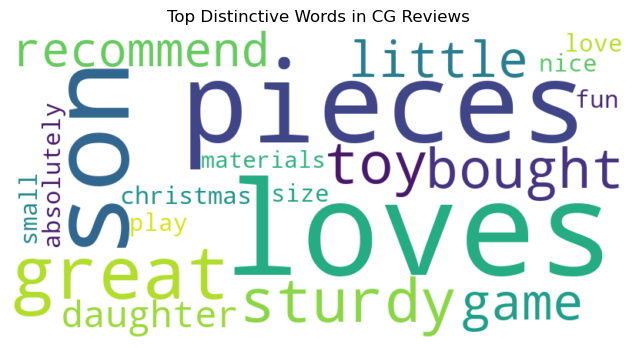

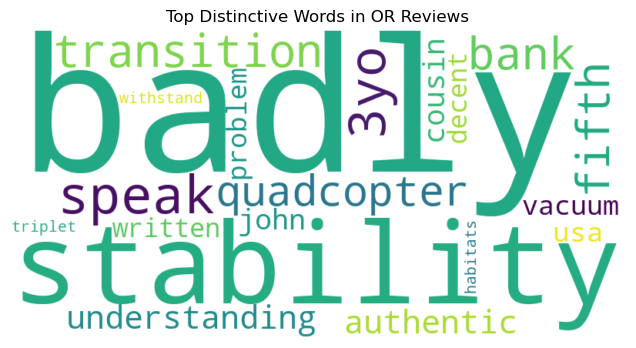

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of words and their importance for the word cloud
cg_word_freq = top_cg_words['cg_or_diff'].to_dict()
or_word_freq = top_or_words['cg_or_diff'].to_dict()

# Generate and plot the word cloud for CG reviews
plt.figure(figsize=(10, 4))
cg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cg_word_freq)
plt.imshow(cg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Distinctive Words in CG Reviews")
plt.show()

# Generate and plot the word cloud for OR reviews
plt.figure(figsize=(10, 4))
or_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(or_word_freq)
plt.imshow(or_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Distinctive Words in OR Reviews")
plt.show()
